In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

# Load cleaned GeoJSON files
gdf_apt = gpd.read_file("cleaned_data/cleaned_airports.geojson")
gdf_asp = gpd.read_file("cleaned_data/cleaned_airspace.geojson")
gdf_obs = gpd.read_file("cleaned_data/cleaned_obstructions.geojson")
gdf_nav = gpd.read_file("cleaned_data/cleaned_navaids.geojson")

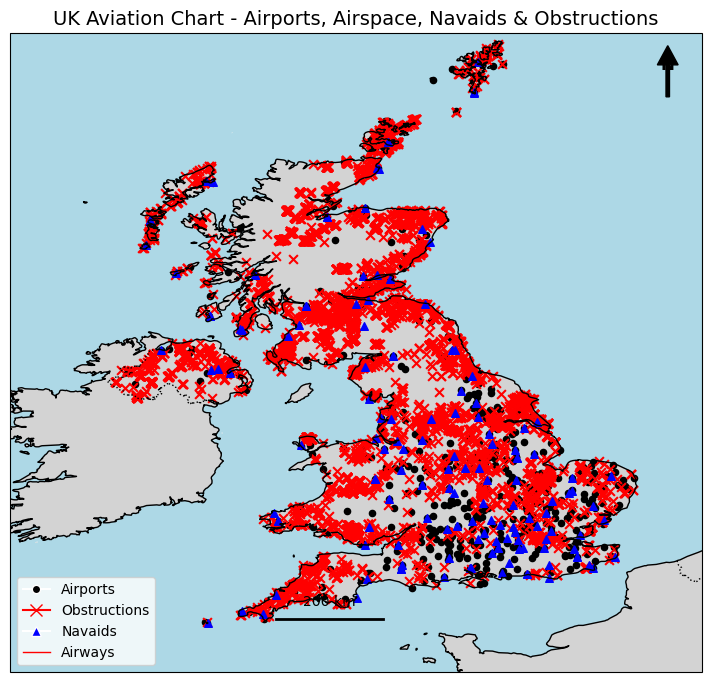

In [4]:
# Create A4 figure (landscape)
fig = plt.figure(figsize=(11.7, 8.3))  # A4 size in inches
ax = plt.axes(projection=ccrs.PlateCarree())

# Base map
ax.set_extent([-10, 3, 49, 61])  # Roughly UK bounds
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor="lightgrey")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

# Plot Airspace (Airways as red lines)
for _, row in gdf_asp.iterrows():
    geom = row.geometry
    if geom is not None and geom.geom_type == 'LineString':
        x, y = geom.xy
        ax.plot(x, y, color='red', linewidth=1, transform=ccrs.PlateCarree())

# Plot Airports (black circles)
ax.scatter(
    gdf_apt.geometry.x, gdf_apt.geometry.y,
    color="black", s=20, marker="o",
    transform=ccrs.PlateCarree(), label="Airports"
)

# Plot Obstructions (red hazard markers)
ax.scatter(
    gdf_obs.geometry.x, gdf_obs.geometry.y,
    color="red", s=40, marker="x",
    transform=ccrs.PlateCarree(), label="Obstructions"
)

# Plot Navaids (blue triangles)
ax.scatter(
    gdf_nav.geometry.x, gdf_nav.geometry.y,
    color="blue", s=30, marker="^",
    transform=ccrs.PlateCarree(), label="Navaids"
)

# North Arrow
ax.text(
    0.95, 0.95, 'N', transform=ax.transAxes,
    ha='center', va='center', fontsize=12,
    fontweight='bold'
)
ax.arrow(
    0.95, 0.90, 0, 0.05, transform=ax.transAxes,
    width=0.005, head_width=0.03, head_length=0.03,
    fc='k', ec='k'
)

# Scale bar (simplified)
scalebar_x, scalebar_y = -5, 50  # position (lon, lat)
ax.plot([scalebar_x, scalebar_x+2], [scalebar_y, scalebar_y],
        color="black", linewidth=2, transform=ccrs.PlateCarree())
ax.text(scalebar_x+1, scalebar_y+0.2, "200 km",
        ha="center", va="bottom", transform=ccrs.PlateCarree())

# Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Airports',
           markerfacecolor='black', markersize=6),
    Line2D([0], [0], marker='x', color='red', label='Obstructions',
           markersize=8),
    Line2D([0], [0], marker='^', color='w', label='Navaids',
           markerfacecolor='blue', markersize=7),
    Line2D([0], [0], color='red', lw=1, label='Airways')
]
ax.legend(handles=legend_elements, loc='lower left')

plt.title("UK Aviation Chart - Airports, Airspace, Navaids & Obstructions", fontsize=14)

# Save as high-resolution PNG
plt.savefig("aviation_chart.png", dpi=300, bbox_inches="tight")

# Save as vector PDF (best for printing)
plt.savefig("aviation_chart.pdf", bbox_inches="tight")

plt.show()
